# Problem 1

## Part a

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1=pd.read_csv('DF1', usecols=['0','1','2','3'])
df2=pd.read_csv('DF2', usecols=['0','1'])

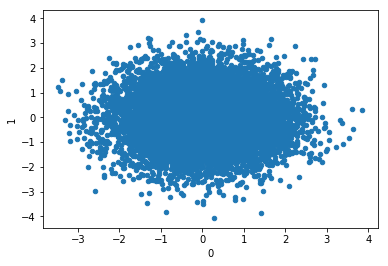

In [7]:
ax_10_11=df1.plot.scatter(x='0', y='1')

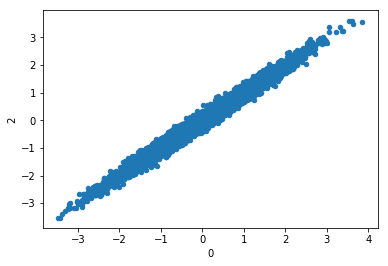

In [8]:
ax_10_12=df1.plot.scatter(x='0', y='2')

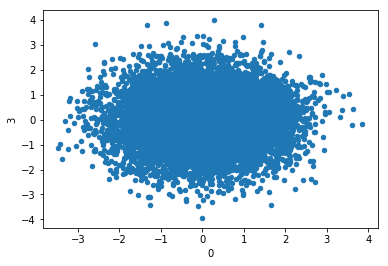

In [9]:
ax_10_13=df1.plot.scatter(x='0', y='3')

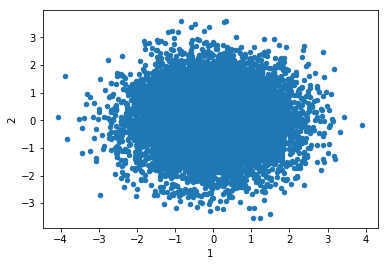

In [10]:
ax_11_12=df1.plot.scatter(x='1', y='2')

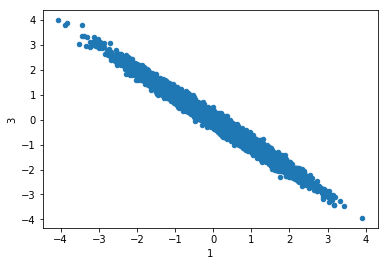

In [11]:
ax_11_13=df1.plot.scatter(x='1', y='3')

**Answer:**  From these scatter plots, it's apparent that, columns `(0,2)` and `(1,3)` are correlated.

## Part b

The covariance matrix, $ \textbf{S} $ , is given by

\begin{align*}
\textbf{S} = \begin{bmatrix}
    s_{11} & s_{12} & s_{13} & \dots  & s_{1n} \\
    s_{21} & s_{22} & s_{23} & \dots  & s_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    s_{m1} & s_{m2} & s_{m3} & \dots  & s_{mn}
\end{bmatrix}
\newline
s_{ij} = \frac{1}{n-1}\sum^n_{i=1}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})
\end{align*}



In [12]:
df1.cov()

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


From the convariance matrix above, we see that $$ s_{02} \approx 1 $$ and $$ s_{13} \approx -1 $$ This means that `(0,2)` and `(1,3)` are correlated with each other just like we found from the scatter plot.

# Part c

My strategy for generating this data is to first generate Gaussian data for $ X_1 $ , $ X_2 $ , and $ X_3 $ and then multiply the data by the cholesky square root of covariance matrix which looks like:


\begin{align}
\textbf{C} = \begin{bmatrix}
    1 & 0 & 0  \\
    0 & 1 & .5 \\
    0 & .5 & 1
\end{bmatrix}
\end{align}


In [13]:
def p1_generate_uncorrelated_size_n(n):
    return np.concatenate(
        (
            np.matrix(np.random.normal(0, 1, n)).T, 
            np.matrix(np.random.normal(0, 1, n)).T, 
            np.matrix(np.random.normal(0, 1, n)).T
        ), axis=1)

def correlate_data(uncorrelated_data):
    cor_mat = np.matrix([[1,0,0],[0,1,.5],[0,.5,1]])
    return np.matmul(uncorrelated_data, np.linalg.cholesky(cor_mat))

def p1_generate_data(n):
    return correlate_data(p1_generate_uncorrelated_size_n(n)).T

In [14]:
p1_generate_data(10)

matrix([[-0.38896515,  1.85110312, -1.8088857 , -1.38940082, -0.13938328,
         -0.40001948, -0.390684  , -0.47174546, -0.43188665,  1.2841102 ],
        [-0.24451542, -1.5862039 ,  1.44858752,  0.19242884,  1.03401049,
         -0.873857  , -0.73230098,  1.25752926,  0.26040371,  0.89532965],
        [ 0.46485933,  0.94664442, -0.14197488,  0.2934427 ,  1.63958854,
          0.1958798 , -0.41889969,  0.26939214,  0.403843  ,  1.68279139]])

In [15]:
np.cov(p1_generate_data(1000000))

array([[ 1.00124621e+00,  8.07946944e-04, -1.00825053e-05],
       [ 8.07946944e-04,  1.25100443e+00,  4.32295951e-01],
       [-1.00825053e-05,  4.32295951e-01,  7.48784374e-01]])

In [16]:
convariance_term_deltas = [(i, np.cov(p1_generate_data(i))[1][2]) for i in range(1000, 1000000, 1000)]

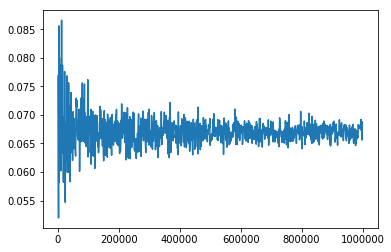

In [114]:
import math
plt.plot(
    [ele[0] for ele in convariance_term_deltas], 
    [math.fabs(.5-ele[1]) for ele in convariance_term_deltas])



# Problem 2

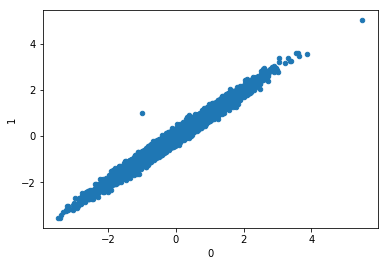

In [18]:
p2_scat=df2.plot.scatter(x='0', y='1')

In [19]:
p2_cov_hat=df2.cov()
p2_cov_hat

,0,1
0,1.004648,0.994242
1,0.994242,1.004160


In [20]:
from scipy.linalg import sqrtm
p2_sigma_hat_inv_sqrt = np.linalg.inv(sqrtm(p2_cov_hat))

In [21]:
p2_sigma_hat_inv_sqrt
print(df2['0'].mean())
print(df2['1'].mean())
p2_adjusted_data = np.matmul(df2, p2_sigma_hat_inv_sqrt)
p2_adjusted_data

0.008139294707102706
0.008168718222844177


array([[ 1.67059188, -0.3455702 ],
       [ 1.01575115, -0.68382202],
       [-0.9567023 ,  1.18835662],
       ...,
       [-0.20960742,  1.59865133],
       [ 0.05182477,  0.66422273],
       [ 0.74493776,  0.97974232]])

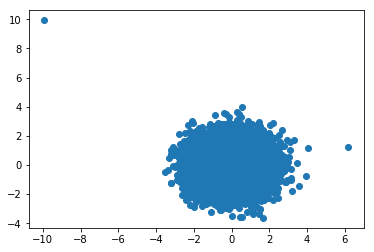

In [22]:
plt.scatter([i[0] for i in p2_adjusted_data], [i[1] for i in p2_adjusted_data])

In [23]:
print(np.linalg.norm(np.matmul([-1,1], p2_sigma_hat_inv_sqrt)))
print(np.linalg.norm(np.matmul([5.5,5], p2_sigma_hat_inv_sqrt)))

14.029458216126834
6.3102904069078996


Above, I re-scaled the two mentioned points using the empirical covariance matrix. I then calculated the euclidean distance of these two points from the origin. By comparing the norms of these two points, we see that the `(-1, 1)` point is a larger outlyer than `(-5, 5)`,

# Problem 3

In [123]:
def calculate_beta_n(n):
    β_hat_vals=[]
    for _ in range(n):
        x = np.random.normal(0, 1, 150)
        e = np.random.normal(0,1,150)

        y = -3 + e
        β_hat = sum([x[i]*y[i] for i in range(150)])/sum([x[i] ** 2 for i in range(150)])
        β_hat_vals.append(β_hat)

    return sum(β_hat_vals) / n
print(calculate_beta_n(150))

-0.008394509400256508


Since -.15 is a full order of magnitude smaller than our empirical standard error, -.022, -.15 is quite significant.

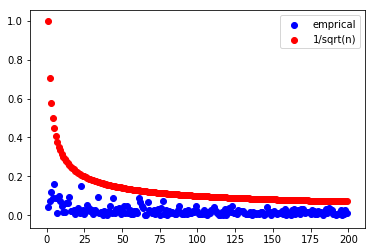

In [127]:
beta_vals = [(n, calculate_beta_n(n)) for n in range(1, 200)]
one_over_N = [(n,1/math.sqrt(n)) for n in range(1, 200) ]
fig = plt.figure()
ax1 = fig.add_subplot(111)

# taking absolute value to get magnitude of standard error
ax1.scatter([x[0] for x in beta_vals], [abs(x[1]) for x in beta_vals], label='emprical', c='b')
ax1.scatter([x[0] for x in one_over_N], [x[1] for x in one_over_N], label='1/sqrt(n)', c='r')
plt.legend(loc='upper right')
plt.show()

# Problem 4

In [24]:
def read_csv(year):
    return pd.read_csv(f"Names/yob{str(year)}.txt", header=None, names=['name', 'gender', 'frequency'])
def find_top_k_names(year, k):
    return read_csv(year).sort_values(by=['frequency'], ascending=False)['name'][:k]


find_top_k_names(1880, 3)

942       John
943    William
0         Mary
Name: name, dtype: object

In [55]:
def print_result(freq, name, gender):
    if freq:
        fstring = f"Frequency of {name} for {gender}s: {freq}"
    else:
        fstring = f"{name} not found for gender {gender}"
    print(fstring)

def find_abs_freq_for_name(year, name, print_output=True):
    
    df = read_csv(year)
    male_freq = df.loc[(df['name'] == name) & (df['gender'] == 'M')]['frequency']
    female_freq = df.loc[(df['name'] == name) & (df['gender'] == 'F')]['frequency']
    
    male_freq = male_freq.item() if not male_freq.empty else 0
    female_freq = female_freq.item() if not female_freq.empty else 0
        
    if print_output:
        print_result(male_freq, name, 'male')
        print_result(female_freq, name, 'female')
    
    return (male_freq, female_freq)

find_abs_freq_for_name(1880, 'May')

May not found for gender male
Frequency of May for females: 462


(0, 462)

In [57]:
def get_relative_freq(year, name):
    df = read_csv(year)
    
    male_abs_freq, female_abs_freq = find_abs_freq_for_name(year, name, print_output=False)
    
    total_male_names = df.loc[df['gender'] == 'M']['frequency'].sum()
    total_female_names = df.loc[df['gender'] == 'F']['frequency'].sum()
    
    print_result(male_abs_freq / total_male_names, name, 'male')
    print_result(female_abs_freq / total_female_names, name, 'female')
    
get_relative_freq(1880, 'May')

May not found for gender male
Frequency of May for females: 0.005077369439071566


In [92]:
def find_all_names_switched_gender():
    def get_total_names_for_gender(dataframe, gender):
        return dataframe.loc[dataframe['gender'] == gender]['frequency'].sum()
    
    def get_rel_freq(row, total_male, total_female):
        return row['frequency'] / total_male if row['gender'] == 'M' else row['frequency'] / total_female
    
    most_common_dict = {}
    switched_names = set()
    for year in range(1880, 2016):
        if not year % 10:
            print(year)
        df = read_csv(year)
        total_male_names = get_total_names_for_gender(df, 'M')
        total_female_names = get_total_names_for_gender(df, 'F')
        most_common_for_this_year = {}
        for _, row in df.iterrows():
            name = row['name']
            rel_freq = get_rel_freq(row, total_male_names, total_female_names)
            if name not in most_common_for_this_year:
                most_common_for_this_year[name] = {'frequency': rel_freq, 'year': year, 'gender': row['gender']}
            elif most_common_for_this_year[name]['frequency'] < rel_freq:
                most_common_for_this_year[name] = {'frequency': rel_freq, 'year': year, 'gender': row['gender']}

        for name, freq_dict in most_common_for_this_year.items():
            if name not in most_common_dict:
                most_common_dict[name] = freq_dict
            elif freq_dict['gender'] != most_common_dict[name]['gender']:
                switched_names.add(name)
                
    print("Names that switched gender: " + ', '.join(switched_names))

find_all_names_switched_gender()
                

1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
Names that switched gender: Saint, Jasiyah, Chayse, Deshone, Erza, Artie, Remmy, Kmari, Marrion, Maciah, Marshawn, Devlyn, Eldrid, Zan, Sevyn, Amaree, Bristin, Tore, Semaj, Nellis, Perrin, Cimarron, Damilola, Rorey, Kareen, Mattison, Matty, Dezmyn, Zacharee, Tennell, Linn, Breaun, Sharn, Keontay, Mischa, Almer, Collie, Amor, Joal, Ariyan, Ogechukwu, Jode, Dakkota, Artemis, Kham, Tieler, Camrin, Dennell, Hannan, Eldie, Rochon, Taymar, Braylin, Lakai, Reshawn, Kayland, Sri, Enes, Rei, Talma, Ellington, Keagan, Tenny, Sugar, Jie, Unk, Carris, Bralen, Honore, Teshawn, Mathai, Yandi, Shellie, Murrell, Juell, Jonel, Norvell, Orbie, Jung, Frankey, Bianco, Ozzie, Shinobu, Kem, Jacy, Mena, Bee, Jupiter, Min, Del, Georgy, Egan, Carmi, Kamarri, Dodi, Ermel, Lamoni, Ozell, Shams, Tristyn, Grae, Sothea, Lafrance, Edwidge, Kamil, Gentry, Marquelle, Joedy, Cordell, Michell, Tash, Georgio, Asencion, Mirage, Riko, Rainey, Pranjal, Pa

# Problem 5

In [93]:
tweets = pd.read_csv("tweets.csv")
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


In [94]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)

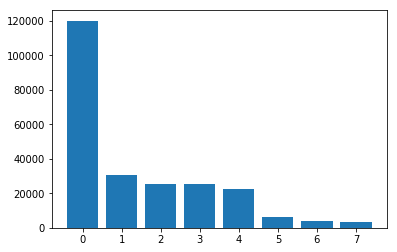

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [96]:
%matplotlib inline
counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()

print(counts)


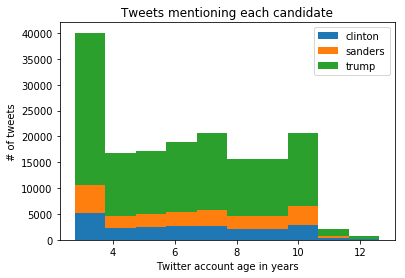

In [101]:
from datetime import datetime

tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.annotate('More Trump tweets', xy=(1, 35000), xytext=(2, 35000),
            arrowprops=dict(facecolor='black'))
plt.show()

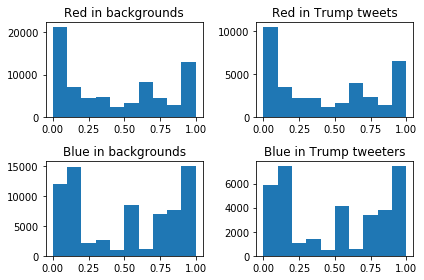

In [103]:
import matplotlib.colors as colors

tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])

tc = tweets[~tweets["user_bg_color"].isin(["C0DEED", "000000", "F5F8FA"])]

def create_plot(data):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flat

    ax0.hist(data["red"])
    ax0.set_title('Red in backgrounds')

    ax1.hist(data["red"][data["candidate"] == "trump"].values)
    ax1.set_title('Red in Trump tweets')

    ax2.hist(data["blue"])
    ax2.set_title('Blue in backgrounds')

    ax3.hist(data["blue"][data["candidate"] == "trump"].values)
    ax3.set_title('Blue in Trump tweeters')

    plt.tight_layout()
    plt.show()

create_plot(tc)


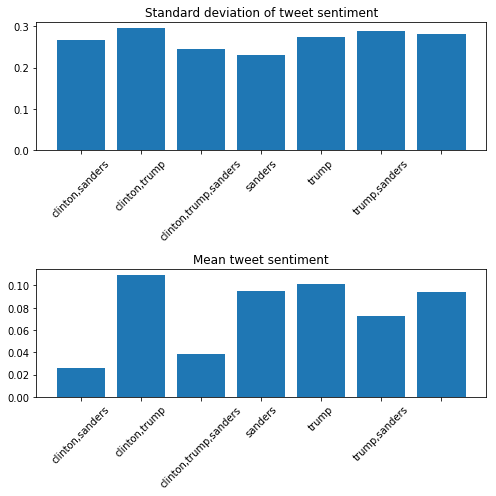

In [104]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()

In [105]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)

tl = {}
for candidate in ["clinton", "sanders", "trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()

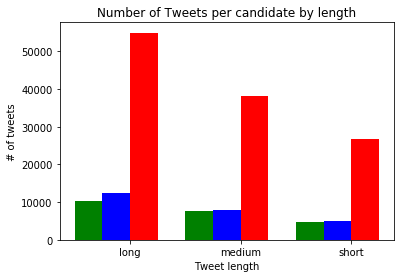

In [106]:
fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))
ax.bar(x, tl["clinton"], width, color='g')
ax.bar(x + width, tl["sanders"], width, color='b')
ax.bar(x + (width * 2), tl["trump"], width, color='r')

ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()